In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

***Importing Datasets***

In [2]:
df = pd.read_csv('/kaggle/input/ipba-12-nlp-with-disaster-tweets/test.csv')
df_train = pd.read_csv('/kaggle/input/ipba-12-nlp-with-disaster-tweets/train.csv')

In [3]:
df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
df_train.head()
df.shape

(3263, 4)

In [5]:
df_train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

***Remove Duplicates***

In [6]:
duplicates = df_train[df_train.duplicated(['text', 'target'], keep=False)]
print(len(duplicates))
duplicates.head()

157


,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0


In [7]:
df_train.drop_duplicates(['text', 'target'], inplace=True, ignore_index=True)
print(df_train.shape, df.shape)


(7521, 5) (3263, 4)


In [8]:
duplicates_new = df_train[df_train.duplicated(['keyword', 'text'], keep=False)]

print(len(duplicates_new))

30


In [9]:
duplicates_new[['text', 'target']].sort_values(by='text')

,text,target
4238,#Allah describes piling up #wealth thinking it...,0
4253,#Allah describes piling up #wealth thinking it...,1
4171,#foodscare #offers2go #NestleIndia slips into ...,1
4193,#foodscare #offers2go #NestleIndia slips into ...,0
2802,.POTUS #StrategicPatience is a strategy for #G...,1
2803,.POTUS #StrategicPatience is a strategy for #G...,0
4554,CLEARED:incident with injury:I-495 inner loop...,0
4535,CLEARED:incident with injury:I-495 inner loop...,1
4182,Caution: breathing may be hazardous to your he...,1
4185,Caution: breathing may be hazardous to your he...,0


In [10]:
# Dropping the target labels that are false for each duplicate pair
# df_train.drop([4251, 4193, 2802, 4554, 4182, 3212, 4249, 4259, 6535, 4319, 4239, 606, 3936, 6018, 5573], inplace=True)

In [11]:
df_train = df_train.reset_index(drop=True)
df_train


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7516,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7517,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7518,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7519,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


***Lower Casing***

In [12]:
df_train["text_lower"] = df_train["text"].str.lower()
df_train.head()

,id,keyword,location,text,target,text_lower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


***Remove Punctuation***

In [13]:
import string

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text_lower):
    """custom function to remove the punctuation"""
    return text_lower.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_train["text_wo_punct"] = df_train["text_lower"].apply(lambda text: remove_punctuation(text))
df_train.head()

,id,keyword,location,text,target,text_lower,text_wo_punct
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,just got sent this photo from ruby alaska as s...


In [14]:
df_train.drop(["text"], axis = 1, inplace = True)
df_train.head()

,id,keyword,location,target,text_lower,text_wo_punct
0,1,NaN,NaN,1,our deeds are the reason of this #earthquake m...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,all residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,6,NaN,NaN,1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,just got sent this photo from ruby #alaska as ...,just got sent this photo from ruby alaska as s...


In [15]:
df_train.drop(["text_lower"], axis = 1, inplace = True)
df_train.head()

,id,keyword,location,target,text_wo_punct
0,1,NaN,NaN,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,1,forest fire near la ronge sask canada
2,5,NaN,NaN,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,just got sent this photo from ruby alaska as s...


***Removal of Stop Words***

In [16]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text_wo_punct):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text_wo_punct).split() if word not in STOPWORDS])

df_train["text_wo_stop"] = df_train["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df_train.head()

,id,keyword,location,target,text_wo_punct,text_wo_stop
0,1,NaN,NaN,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,all residents asked to shelter in place are be...,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...


In [18]:
df_train.drop(["text_wo_punct"], axis = 1, inplace = True)
df_train.head()

,id,keyword,location,target,text_wo_stop
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...


In [19]:
df_train.head()

,id,keyword,location,target,text_wo_stop
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...


***Removal of Frequent Words***

In [20]:
df_train.shape

(7521, 5)

In [21]:
from collections import Counter
cnt = Counter()
for text in df_train["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('like', 344),
 ('im', 297),
 ('amp', 296),
 ('fire', 245),
 ('get', 229),
 ('new', 223),
 ('via', 217),
 ('people', 193),
 ('one', 193),
 ('news', 192)]

In [22]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(3)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df_train["text_wo_stopfreq"] = df_train["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df_train.head()

,id,keyword,location,target,text_wo_stop,text_wo_stopfreq
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


***Removal of Rare Words***

In [23]:
# Drop the two columns which are no more needed 
df_train.drop(["text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df_train["text_wo_stopfreqrare"] = df_train["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df_train.head()

,id,keyword,location,target,text_wo_stopfreq,text_wo_stopfreqrare
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


***Stemming***

In [24]:
df_train

,id,keyword,location,target,text_wo_stopfreq,text_wo_stopfreqrare
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
7516,10863,NaN,NaN,1,worldnews fallen powerlines glink tram update ...,worldnews fallen powerlines glink tram update ...
7517,10864,NaN,NaN,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...
7518,10866,NaN,NaN,1,suicide bomber kills 15 saudi security site mo...,suicide bomber kills 15 saudi security site mo...
7519,10869,NaN,NaN,1,two giant cranes holding bridge collapse nearb...,two giant cranes holding bridge collapse nearb...


In [25]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_train["text_stemmed"] = df_train["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))
df_train.head()

,id,keyword,location,target,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la rong sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,13000 peopl receiv wildfir evacu order california
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...


***Lemmatization***

In [26]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_train["text_lemmatized"] = df_train["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df_train.head()


[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


,id,keyword,location,target,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us,deed reason earthquake may allah forgive u
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la rong sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...,resident asked shelter place notified officer ...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,13000 peopl receiv wildfir evacu order california,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...,got sent photo ruby alaska smoke wildfire pour...


In [27]:
import nltk

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_train["text_lemmatized"] = df_train["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df_train.head()

,id,keyword,location,target,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us,deed reason earthquake may allah forgive u
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la rong sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...,resident ask shelter place notify officer evac...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,13000 peopl receiv wildfir evacu order california,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...,get sent photo ruby alaska smoke wildfires pou...


In [28]:
df_train.drop(["text_wo_stopfreqrare"], axis=1, inplace=True)
df_train.drop(["text_stemmed"], axis=1, inplace=True)
df_train

,id,keyword,location,target,text_wo_stopfreq,text_lemmatized
0,1,NaN,NaN,1,deeds reason earthquake may allah forgive us,deed reason earthquake may allah forgive u
1,4,NaN,NaN,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,1,residents asked shelter place notified officer...,resident ask shelter place notify officer evac...
3,6,NaN,NaN,1,13000 people receive wildfires evacuation orde...,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,1,got sent photo ruby alaska smoke wildfires pou...,get sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
7516,10863,NaN,NaN,1,worldnews fallen powerlines glink tram update ...,worldnews fall powerlines glink tram update fi...
7517,10864,NaN,NaN,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...
7518,10866,NaN,NaN,1,suicide bomber kills 15 saudi security site mo...,suicide bomber kill 15 saudi security site mos...
7519,10869,NaN,NaN,1,two giant cranes holding bridge collapse nearb...,two giant crane hold bridge collapse nearby home


***Word Cloud***

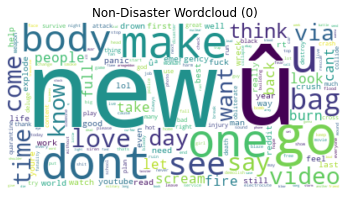

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud_0 = WordCloud(collocations=False, background_color='white').generate(' '.join(df_train['text_lemmatized'][df_train['target']==0]))
plt.imshow(word_cloud_0, interpolation='bilinear')
plt.title('Non-Disaster Wordcloud (0)')
plt.axis('off')
plt.show()

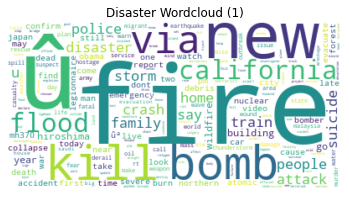

In [30]:
word_cloud_1 = WordCloud(collocations=False, background_color='white').generate(' '.join(df_train['text_lemmatized'][df_train['target']==1]))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.title('Disaster Wordcloud (1)')
plt.axis('off')
plt.show()

In [31]:
import re

pattern_new = re.compile(r'\bnew\b')

print('Training Counts of \'new\': ', len(re.findall(pattern_new, ' '.join(df_train['text_lemmatized']))))
print('Test Counts of \'new\': ', len(re.findall(pattern_new, ' '.join(df['text']))))

Training Counts of 'new':  231
Test Counts of 'new':  37


In [32]:
df_train['text_lemmatized'] = df_train['text_lemmatized'].apply(lambda x: re.sub(pattern_new, '', x) if pd.isna(x) != True else x)
df['text'] = df['text'].apply(lambda x: re.sub(pattern_new, '', x) if pd.isna(x) != True else x)

In [33]:
print('Training Counts of \'new\': ', len(re.findall(pattern_new, ' '.join(df_train['text_lemmatized']))))
print('Test Counts of \'new\': ', len(re.findall(pattern_new, ' '.join(df['text']))))

Training Counts of 'new':  0
Test Counts of 'new':  0


In [34]:
df_train.isnull().sum()

id                     0
keyword               56
location            2490
target                 0
text_wo_stopfreq       0
text_lemmatized        0
dtype: int64

In [35]:
df_train = df_train.drop(['id', 'keyword', 'location'], axis = 1)

In [36]:
df_train = df_train.drop(['text_wo_stopfreq'], axis = 1)

In [37]:
df_train

,target,text_lemmatized
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident ask shelter place notify officer evac...
3,1,13000 people receive wildfire evacuation order...
4,1,get sent photo ruby alaska smoke wildfires pou...
...,...,...
7516,1,worldnews fall powerlines glink tram update fi...
7517,1,flip side walmart bomb everyone evacuate stay ...
7518,1,suicide bomber kill 15 saudi security site mos...
7519,1,two giant crane hold bridge collapse nearby home


In [38]:
# Seperating the text feature and the target, and then splitting both into train and validation sets
from sklearn.model_selection import train_test_split


X = df_train['text_lemmatized']
y = df_train['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

X_train.head()

2868                             graysondolan u let drown
3784    999day emergency service display meet brave po...
6824    cwheate hahaha half traumatise half hop labour...
6337    suicide bomber kill dozen saudi mosque saudi a...
17                                          summer lovely
Name: text_lemmatized, dtype: object

***Tokenization***

In [39]:
from nltk.tokenize import RegexpTokenizer

#Initialize expressions
tokenizer = RegexpTokenizer(r"\w+") # only select alphanumeric characters
en_stop = set(stopwords.words('english')) # get all the English language stopwords
ps = PorterStemmer() # to extract stem out of any given word

In [40]:
def getStemmedTweet(tweet):
    
    tokens = tokenizer.tokenize(tweet)
    new_tokens = [token for token in tokens if token not in en_stop]
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    
    cleaned_review = ' '.join(stemmed_tokens)
    
    return cleaned_review

In [41]:
# Applying the preprocessing pipeline function on the whole dataset
X_cleaned = X_train.apply(getStemmedTweet)
Xval_cleaned = X_val.apply(getStemmedTweet)

***Naive Bayes Model*** 

In [42]:
#Vectorize

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_vec = cv.fit_transform(X_cleaned).toarray()
Xval_vec = cv.transform(Xval_cleaned).toarray()

print(X_vec.shape)
print(Xval_vec.shape)

(5640, 15525)
(1881, 15525)


Training the classifier

### Outcome of LazyClassifier
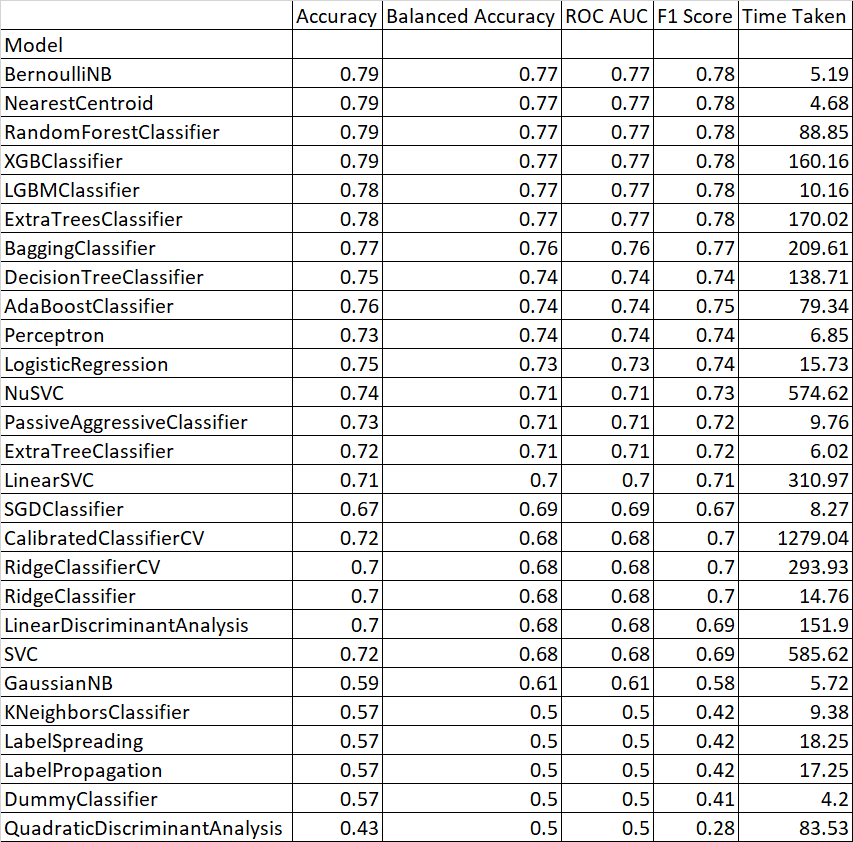
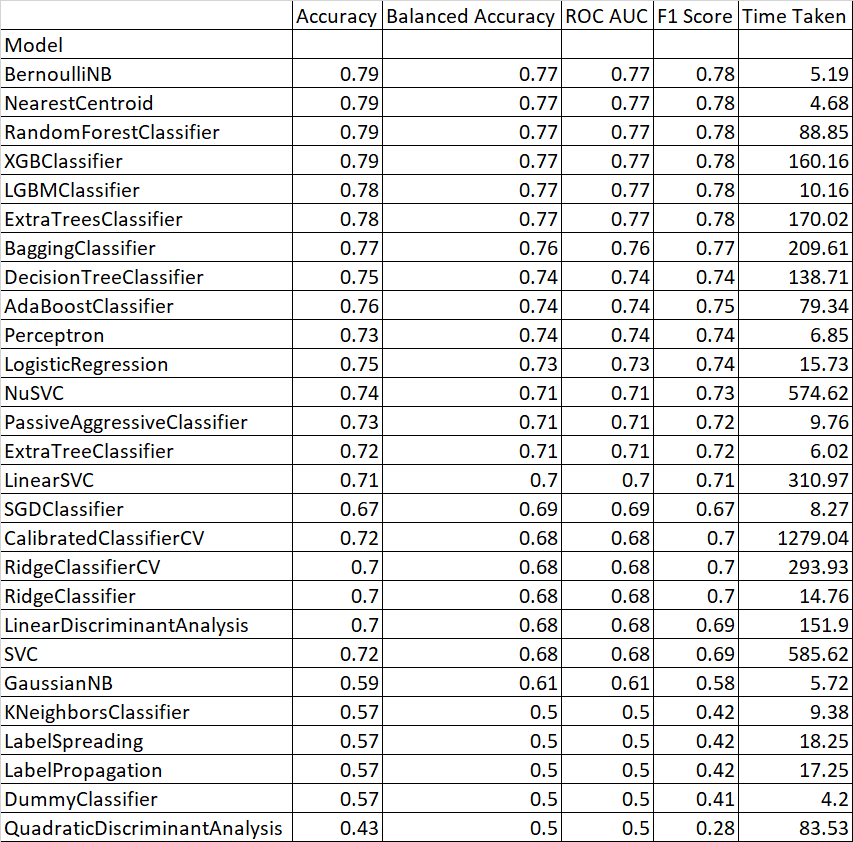
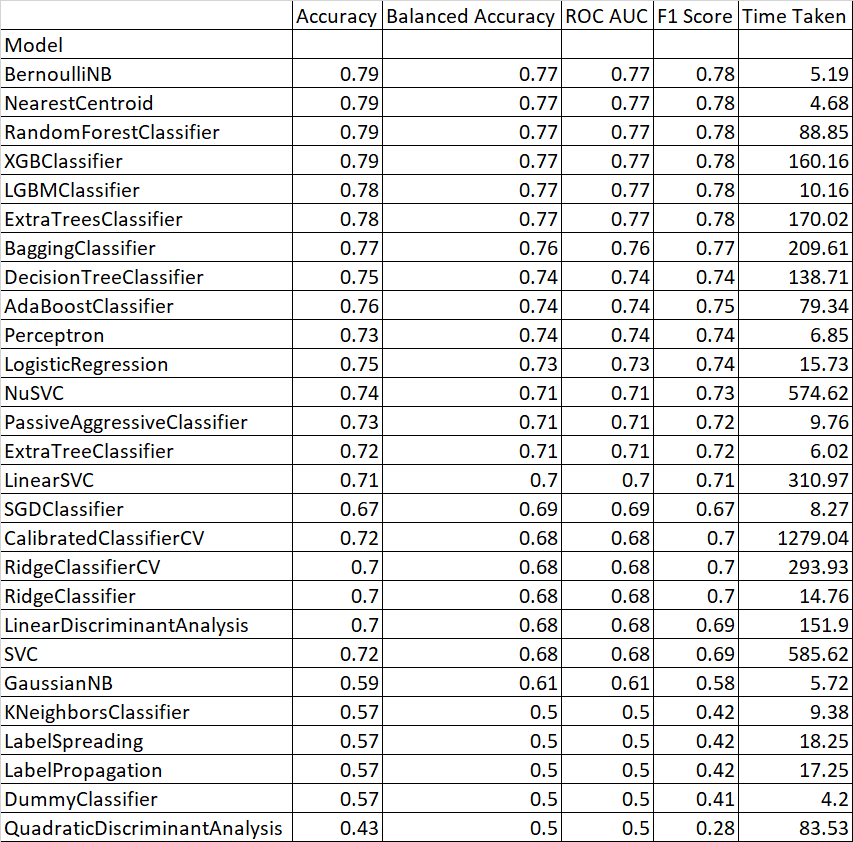
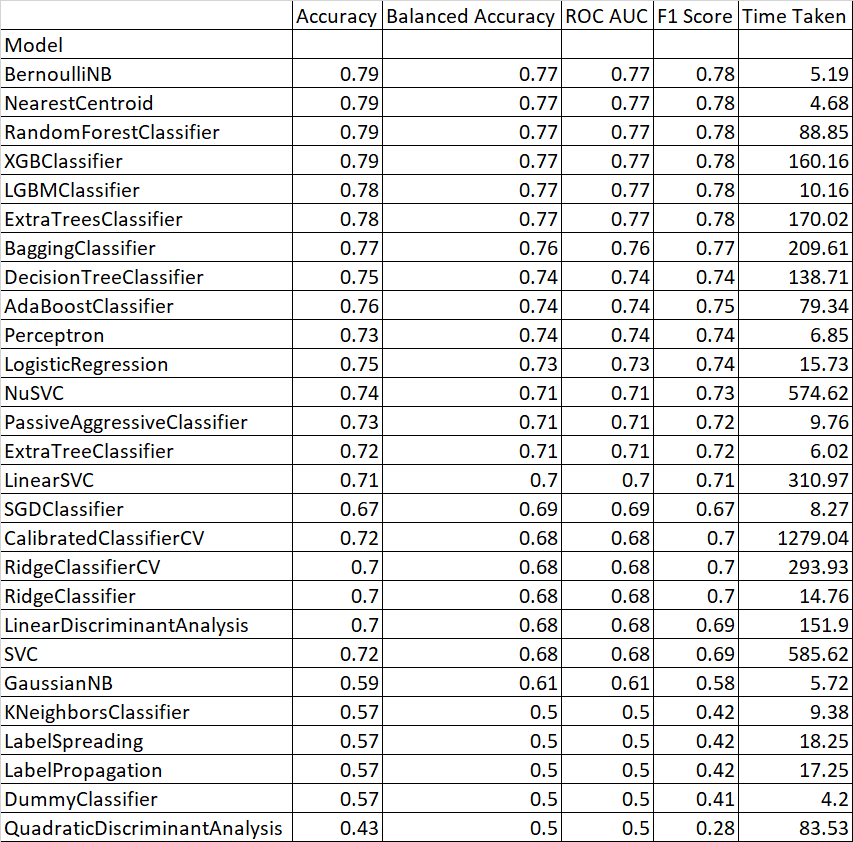

In [43]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_vec, y_train)

MultinomialNB()

In [44]:
## Check the accuracy

mnb.score(Xval_vec, y_val)

0.7931951089845827

**Prediction on Test set**

In [45]:
# get the main 'text' column
test_ids = df['id']
df = df['text']

# apply the preprocessing pipeline
df = df.apply(getStemmedTweet)

# creating the count vectors from the dataset
test_vec = cv.transform(df).toarray()

predictions = mnb.predict(test_vec)

In [46]:
predictions = pd.Series(predictions)
ids = pd.Series(test_ids)

pred_df = pd.concat([ids, predictions], keys = ['id', 'target'], axis = 1)

pred_df.to_csv('submission.csv',index = False)